# NetworkX Basics



In [27]:
import networkx as nx
from networkx.algorithms import bipartite
%matplotlib inline

## Bipartite graphs

Bipartite graph is a graph whose nodes can be split into two sets $L$ and $R$ and every edge connects a node in $L$ to a node in $R$.

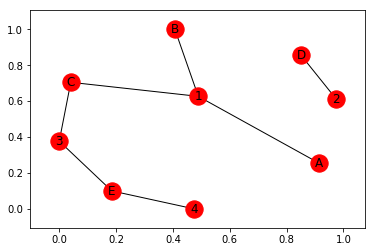

In [28]:
B = nx.Graph() # no separate class for bipartite graphs
B.add_nodes_from(['A', 'B', 'C', 'D', 'E'], bipartite = 0) # label one set of nodes 0
B.add_nodes_from([1, 2, 3, 4], bipartite = 1) # label the other set of nodes 1
B.add_edges_from([('A',1), ('B',1), ('C',1), ('C',3), ('D',2), ('E',3), ('E',4)])
nx.draw_networkx(B)

### Checking whether a graph is bipartite

In [9]:
bipartite.is_bipartite(B)

True

### Checking if a set of nodes is a bipartition of the graph

In [13]:
bipartite.is_bipartite_node_set(B, set([1, 2, 3]))    # False
bipartite.is_bipartite_node_set(B, set([1, 2, 3, 4])) # True

True

### Identifying the bipartitions

In [14]:
bipartite.sets(B)

({'A', 'B', 'C', 'D', 'E'}, {1, 2, 3, 4})

### Projected Graphs

**$L$-Bipartite graph of projections**: Network of nodes in group $L$, where a pair of nodes is connected if they have a common neighbor in $R$ in the bipartite graph.

['E', 'A', 'B', 'D', 'C']
[('E', 'C'), ('A', 'C'), ('A', 'B'), ('B', 'C')]


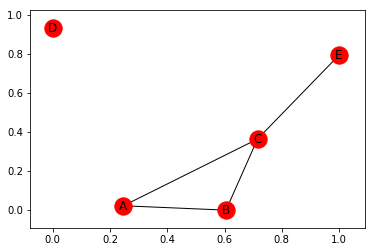

In [30]:
lset = bipartite.sets(B)[0] # get the L-set of nodes
lproject = bipartite.projected_graph(B, lset) # build the projected graph
print(lproject.nodes())
print(lproject.edges())
nx.draw_networkx(lproject)

We can add weights to the nodes of these graphs depending on the number of nodes they have in common from the R-set of nodes.

In [23]:
lproject = bipartite.weighted_projected_graph(B, lset) # build the weighted projected graph
lproject.edges(data=True)

[('E', 'C', {'weight': 1}),
 ('A', 'C', {'weight': 1}),
 ('A', 'B', {'weight': 1}),
 ('B', 'C', {'weight': 1})]